In [1]:
from env import get_db_url 

In [2]:
import os

In [3]:
import pandas as pd

In [4]:
import wrangle as w
import explore_mod as em

In [5]:
import scipy.stats as stats

In [6]:
telco = w.get_telco_data()

In [7]:
telco = w.prep_telco(telco)

In [ ]:
pd.crosstab(telco.internet_service_type, telco.churn)

In [ ]:
len(telco)

In [ ]:
113/(1413+113)

In [ ]:
113/7043

In [ ]:
(1297+459)/(1297+459+1962+1799)

In [22]:
train_telco.payment_type.value_counts()

Electronic check             1343
Bank transfer (automatic)     742
Credit card (automatic)       701
Mailed check                  523
Name: payment_type, dtype: int64

In [24]:
import matplotlib.pyplot as plt

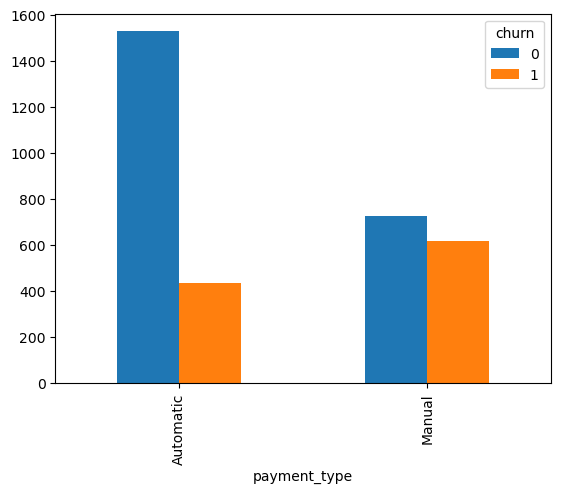

In [31]:
pct = pd.crosstab(train_telco.payment_type, train_telco.churn)
pct.plot.bar()
plt.show()

In [32]:
stats.chi2_contingency(pct)

(205.6280152258547,
 1.2352526491206959e-46,
 1,
 array([[1339.77938954,  626.22061046],
        [ 915.22061046,  427.77938954]]))

In [28]:
import numpy as np

In [30]:
train_telco.payment_type = np.where(train_telco.payment_type == ('Electronic check' or 'Mailed check'), 'Manual', 'Automatic')

In [ ]:
((telco.online_security == 'No internet service') == (telco.online_backup == 'No internet service')).mean()



In [ ]:
telco = telco[telco.online_backup != 'No internet service']

In [ ]:
import seaborn as sns

In [ ]:
telco.multiple_lines.value_counts()

In [ ]:
telco.churn = telco.churn.replace([0,1], ['No', 'Yes'])
sns.boxplot(data=telco, x='monthly_charges', y='churn')
plt.show()

In [ ]:
stats.mannwhitneyu(telco[telco.churn == 'No'].monthly_charges, telco[telco.churn == 'Yes'].monthly_charges)

In [ ]:
telco[telco.churn == 'Yes'].monthly_charges.mean() - telco[telco.churn == 'No'].monthly_charges.mean()

In [ ]:
backup_churn = pd.crosstab(telco.online_backup, telco.churn)
backup_churn

In [ ]:
stats.chi2_contingency(backup_churn)

In [ ]:
tech_churn = pd.crosstab(telco.tech_support, telco.churn)
tech_churn

In [ ]:
stats.chi2_contingency(tech_churn)

In [ ]:
dev_churn = pd.crosstab(telco.device_protection, telco.churn)
dev_churn

In [ ]:
stats.chi2_contingency(dev_churn)

In [ ]:
telco.internet_service_type.value_counts()

In [ ]:
int_churn = pd.crosstab(telco.internet_service_type, telco.churn)
int_churn

In [ ]:
stats.chi2_contingency(int_churn)

In [ ]:
telco.churn.value_counts()

In [ ]:
telco.tech_support.value_counts()

In [ ]:
telco.info()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizations of individual variables on their own

for col in telco.iloc[:,[4:]]:
    if telco[col].dtype == 'O':
        print(col.upper())
        plt.hist(telco[col])
        plt.show()
        print()
    else:
        print(col.upper())
        plt.hist(telco[col])
        plt.show()
        print()

In [ ]:
telco.info()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

telco.senior_citizen = telco.senior_citizen.replace([0,1],['No','Yes'])
telco.partner = telco.partner.replace([0,1],['No','Yes'])
telco.dependents = telco.dependents.replace([0,1],['No','Yes'])
telco.phone_service = telco.phone_service.replace([0,1],['No','Yes'])
telco.paperless_billing = telco.paperless_billing.replace([0,1],['No','Yes'])

for col in telco.iloc[:,0:20]:
    if telco[col].dtype == 'O':
        print(col.upper())
        pct = pd.crosstab(telco[col], telco.churn)
        pct.plot.bar()
        plt.show()
        print()
        print(f'Stats results for {col} vs churn:')
        print()
        chi2, p, degf, expected = stats.chi2_contingency(pct)
        print(f'Chi^2 value: {chi2}')
        print(f'P-value: {p}')
        print()
    else:
        print(col.upper())
        sns.boxplot(data=telco, x=col, y='churn')
        plt.show()
        print()
        print(f'Stats results for {col} vs churn:')
        print()
        stat, p = stats.mannwhitneyu(telco[telco.churn == 'No'][col], telco[telco.churn == 'Yes'][col])
        print(f'Stat value: {stat}')
        print(f'P-value: {p}')
        print()
        
# Don't forget to adjust telco.churn == 'No' to 0s and 1s after prep

In [ ]:
pd.crosstab(telco[telco.churn =='No'].payment_type, telco[telco.churn =='No'].tech_support, normalize = True)

In [ ]:
pd.crosstab(telco[telco.churn =='Yes'].payment_type, telco[telco.churn =='Yes'].tech_support, normalize = True)

In [ ]:
pd.crosstab(telco.payment_type, telco.churn, normalize=True, margins=True)

In [ ]:
telco.churn.value_counts()

In [ ]:
3761/(3761+1756)

In [ ]:
among those with internet

phone -05
multiple -05
online sec -96***
online back -48
dev prot -39
tech -92***
stream tv .006
stream mov .003
paperless -26
monthly .003
total_charges -150
contract -188****
inter serv -73
payment type -91***
tenure -203***

In [ ]:
No_internet_service generally has a very low chance of churning

In [ ]:
senior -36
partner -36
dep -43
tenure -124
monthly charges -32
contract type -153
online security -185
online backup -131
device protection -122
tech_support -180
streaming tv -82
streaming movies -82
paperless -58

In [ ]:
sns.boxplot(data=telco, x='tenure', y='churn')
plt.show()

In [ ]:
list(range(1,10))

In [ ]:
telco[telco.churn == 'No']['monthly_charges']

In [ ]:
telco.contract_type.value_counts().plot(kind='barh')
plt.show()

In [ ]:
plt.hist(telco.contract_type)

In [ ]:
telco.tenure.dtype

In [ ]:
for column in telco.iloc[:,11:]:
    print(telco[column].value_counts(dropna=False))
    print()

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
train_telco, validate_telco, test_telco = w.split_data(telco, 'churn')

In [44]:
features = ['tenure', 'contract_type_One year', 'contract_type_Two year', 'online_security_Yes', 'tech_support_Yes', 'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 'payment_type_Mailed check']

In [45]:
X_train = train_telco[features]
y_train = train_telco.churn

X_validate = validate_telco[features]
y_validate = validate_telco.churn

X_test = test_telco[features]
y_test = test_telco.churn

In [ ]:
dtc = DecisionTreeClassifier()

X_train = train_telco[['tenure', 'monthly_charges', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None']]
y_train = train_telco.churn

X_validate = validate_telco[['tenure', 'monthly_charges', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None']]
y_validate = validate_telco.churn

X_test = test_telco[['tenure', 'monthly_charges', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None']]
y_test = test_telco.churn

In [46]:
scores = pd.DataFrame({})

for x in range(1,11):
    dtc = DecisionTreeClassifier(max_depth=x)
    dtc.fit(X_train, y_train)
    score = pd.DataFrame({'train': [dtc.score(X_train, y_train)]
                          , 'model': [dtc.score(X_validate, y_validate)]
                          , 'depth': [x]
                          , 'difference': [(dtc.score(X_train, y_train) - dtc.score(X_validate, y_validate))]})
    scores = pd.concat([scores, score])
    
scores

,train,model,depth,difference
0,0.712300,0.725543,1,-0.013244
0,0.737685,0.739130,2,-0.001445
0,0.739196,0.745471,3,-0.006275
0,0.748867,0.746377,4,0.002490
0,0.753702,0.750906,5,0.002796
0,0.755515,0.755435,6,0.000080
0,0.758840,0.745471,7,0.013369
0,0.765186,0.744565,8,0.020621
0,0.773950,0.735507,9,0.038443
0,0.785131,0.740036,10,0.045095


We'll chose 4

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_validate, y_validate))

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_validate, y_validate))

In [47]:
scores = pd.DataFrame({})

for x in range(1,11):
    rfc = RandomForestClassifier(max_depth=x, min_samples_leaf=11-x)
    rfc.fit(X_train, y_train)
    score = pd.DataFrame({'train': [rfc.score(X_train, y_train)]
                          , 'model': [rfc.score(X_validate, y_validate)]
                          , 'depth': [x]
                          , 'difference': [(rfc.score(X_train, y_train) - rfc.score(X_validate, y_validate))]})
    scores = pd.concat([scores, score])

scores

,train,model,depth,difference
0,0.681475,0.682065,1,-0.000590
0,0.736174,0.740036,2,-0.003862
0,0.750680,0.756341,3,-0.005661
0,0.753400,0.756341,4,-0.002941
0,0.752795,0.757246,5,-0.004451
0,0.756120,0.756341,6,-0.000221
0,0.760955,0.756341,7,0.004614
0,0.764884,0.756341,8,0.008543
0,0.774252,0.750000,9,0.024252
0,0.800846,0.740036,10,0.060810


In [ ]:
y_pred = rfc.predict(X_train)

pd.crosstab(y_train, y_pred)

In [ ]:
pd.crosstab(y_train, y_pred, normalize=True)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_validate, y_validate))

In [38]:
scores = pd.DataFrame({})

for x in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train, y_train)
    score = pd.DataFrame({'train': [knn.score(X_train, y_train)]
                          , 'model': [knn.score(X_validate, y_validate)]
                          , 'neighbors': [x]
                          , 'difference': [(knn.score(X_train, y_train) - knn.score(X_validate, y_validate))]})
    scores = pd.concat([scores, score])

scores

,train,model,neighbors,difference
0,0.693261,0.650362,1,0.042898
0,0.712300,0.704710,2,0.007590
0,0.722877,0.693841,3,0.029036
0,0.720762,0.697464,4,0.023298
0,0.733454,0.710145,5,0.023309
0,0.739801,0.731884,6,0.007916
0,0.739801,0.718297,7,0.021503
0,0.740707,0.728261,8,0.012446
0,0.743427,0.722826,9,0.020601
0,0.739498,0.728261,10,0.011237


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_validate, y_validate))

In [39]:
scores = pd.DataFrame({})

for x in [.1,1,10,100,1000]:
    lr = LogisticRegression(C=x)
    lr.fit(X_train, y_train)
    score = pd.DataFrame({'train': [lr.score(X_train, y_train)]
                          , 'model': [lr.score(X_validate, y_validate)]
                          , 'C': [x]
                          , 'difference': [(lr.score(X_train, y_train) - lr.score(X_validate, y_validate))]})
    scores = pd.concat([scores, score])

scores

,train,model,C,difference
0,0.741614,0.749094,0.1,-0.007480
0,0.735267,0.746377,1.0,-0.011109
0,0.735267,0.746377,10.0,-0.011109
0,0.735267,0.746377,100.0,-0.011109
0,0.735267,0.746377,1000.0,-0.011109


In [ ]:
# import warnings
# warnings.filterwarnings("ignore")

# scores = pd.DataFrame({})

# # Decision Tree

# dtc = DecisionTreeClassifier(max_depth=6)
# dtc.fit(X_train, y_train)

# score = pd.DataFrame({'model': ['Decision Tree']
#                     , 'train': [dtc.score(X_train, y_train)]
#                     , 'validate': [dtc.score(X_validate, y_validate)]
#                     , 'hyper_value': [6]
#                     , 'difference': [(dtc.score(X_train, y_train) - dtc.score(X_validate, y_validate))]})

# scores = pd.concat([scores, score])

# # Random Forest

# rfc = RandomForestClassifier(max_depth=6, min_samples_leaf=5)
# rfc.fit(X_train, y_train)

# score = pd.DataFrame({'model': ['Random Forest']
#                     , 'train': [rfc.score(X_train, y_train)]
#                     , 'validate': [rfc.score(X_validate, y_validate)]
#                     , 'hyper_value': [6]
#                     , 'difference': [(rfc.score(X_train, y_train) - rfc.score(X_validate, y_validate))]})

# scores = pd.concat([scores, score])

# # KNN

# knn = KNeighborsClassifier(n_neighbors=8)
# knn.fit(X_train, y_train)

# score = pd.DataFrame({'model': ['KNN']
#                     , 'train': [knn.score(X_train, y_train)]
#                     , 'validate': [knn.score(X_validate, y_validate)]
#                     , 'hyper_value': [8]
#                     , 'difference': [(knn.score(X_train, y_train) - knn.score(X_validate, y_validate))]})

# scores = pd.concat([scores, score])

# # Logistic Regression

# lr = LogisticRegression(C=10)
# lr.fit(X_train, y_train)

# score = pd.DataFrame({'model': ['Logistic Regression']
#                     , 'train': [lr.score(X_train, y_train)]
#                     , 'validate': [lr.score(X_validate, y_validate)]
#                     , 'hyper_value': [10]
#                     , 'difference': [(lr.score(X_train, y_train) - lr.score(X_validate, y_validate))]})

# scores = pd.concat([scores, score])

# scores.reset_index(drop=True)

In [ ]:
em.classification_models_performance(X_train, y_train, X_validate, y_validate)

In [ ]:
test_telco

In [ ]:
rfc = RandomForestClassifier(max_depth=6, min_samples_leaf=5)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)
predictions = pd.DataFrame({'customer_id': X_test.reset_index().customer_id,
             'prediction': y_pred,
             'churn_prob': y_prob[:,1]})
predictions.to_csv('predictions')

predictions.to_csv()


In [ ]:
pd.DataFrame({'customer_id': X_test.reset_index().customer_id,
             'prediction': y_pred,
             'churn_prob': y_prob[:,1]})

In [ ]:
y_prob[:,1]

In [ ]:
test_telco.reset_index().customer_id

In [16]:
75.55 - 68.14

7.409999999999997

In [18]:
(2255+1054)*.0741

245.1969

In [17]:
80 - 73.48

6.519999999999996

In [19]:
(3104+1121) * .0652

275.46999999999997